<a href="https://colab.research.google.com/github/halisson-gomides/ML-Olympiad-QUALITYEDUCATION/blob/main/EDA_notas_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Olympiad - QUALITY EDUCATION

## Descrição

### ML Olympiad – Previsão das notas da prova do ENEM

*Dados do Exame Nacional do Ensino Médio (Enem)*

#### Dicionário de dados/variáveis:
> https://docs.google.com/spreadsheets/d/14C4lbQFEmUnIJN17gr01L8ikXsT27eHZ/edit?usp=sharing&ouid=101143319330377699057&rtpof=true&sd=true

#### Arquivos
- train.csv - Conjunto de dados de treinamento
- test.csv - Conjunto de dados de teste
- sample_submission.csv - um exemplo de arquivo no formato correto para envio
- Dicionario_Microdados_Enem.xlsx - metadados


#### Validação:
> A validação será realizada utilizando a métrica Mean Columnwise Root Mean Squared Error – MCRMSE.
> ![](https://editor.analyticsvidhya.com/uploads/14412MCRMSE.png)


#### Formato de envio
Os arquivos de envio devem conter seis colunas.
O arquivo deve conter um cabeçalho e ter o seguinte formato:
> ![](https://drive.google.com/uc?id=1HEiVuxYds-YFeQg7hxZgOFPo6G9fCpeV)

## Obtendo os arquivos

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML Olympiad - QUALITY EDUCATION

/content/drive/MyDrive/Colab Notebooks/ML Olympiad - QUALITY EDUCATION


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks" # local onde está o arquivo 'kaggle.json'

In [ ]:
!kaggle competitions download -c qualityeducation

 99% 120M/121M [00:01<00:00, 93.3MB/s]
100% 121M/121M [00:01<00:00, 94.6MB/s]
 87% 33.0M/37.9M [00:00<00:00, 56.3MB/s]
100% 37.9M/37.9M [00:00<00:00, 70.3MB/s]
  0% 0.00/44.1k [00:00<?, ?B/s]
100% 44.1k/44.1k [00:00<00:00, 6.04MB/s]
 97% 256M/264M [00:02<00:00, 109MB/s]
100% 264M/264M [00:03<00:00, 91.6MB/s]


## Instalando bibliotecas uteis

In [ ]:
!pip install datatable NBprocessing joypy cmasher

     |████████████████████████████████| 367 kB 5.3 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 


In [ ]:
!pip install -U matplotlib

     |████████████████████████████████| 11.2 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 51.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## Importando bibliotecas e carregando os dados

In [ ]:
# Importando bibliotecas e setando parâmetros

import numpy as np
import datatable as dt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import gc
from NBprocessing import NBgeneral
from NBprocessing import NBplot
from NBprocessing import NBcategorical

from joypy import joyplot
import cmasher as cmr

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/ML Olympiad - QUALITY EDUCATION/train.csv.zip'
file_path_jay = '/content/drive/MyDrive/Colab Notebooks/ML Olympiad - QUALITY EDUCATION/train.jay'

In [ ]:
%%time
# EXECUTAR APENAS UMA VEZ ESSA CELULA

# Transforma os dados de treino em formato jay para agilizar o carregamento quando rodar o notebook
dt.fread(file_path).to_jay("train.jay")

In [ ]:
%%time
# Carregando os dados

df_raw = dt.fread(file_path_jay).to_pandas()

CPU times: user 17.9 s, sys: 4.93 s, total: 22.8 s
Wall time: 28.6 s


In [ ]:
print(f'Qtd. linhas e colunas: {df_raw.shape}\n')
print(f'Verificação dos tipos:\n')
df_raw.info()

Qtd. linhas e colunas: (3311925, 118)

Verificação dos tipos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311925 entries, 0 to 3311924
Columns: 118 entries, NU_INSCRICAO to Q025
dtypes: bool(53), float64(16), int32(15), object(34)
memory usage: 1.6+ GB


In [ ]:
%%time
# Aplicando função para reduzir o uso de memória pelo dataframe

df_raw = reduce_memory_usage(df_raw)

Mem. usage decreased to 701.77 Mb (56.7% reduction)
CPU times: user 30.2 s, sys: 1.31 s, total: 31.5 s
Wall time: 31.6 s


In [ ]:
df_raw.dtypes

NU_INSCRICAO                     object
CO_MUNICIPIO_RESIDENCIA           int32
NO_MUNICIPIO_RESIDENCIA        category
CO_UF_RESIDENCIA                  int32
SG_UF_RESIDENCIA               category
NU_IDADE                        float32
TP_SEXO                        category
TP_ESTADO_CIVIL                   int32
TP_COR_RACA                       int32
TP_NACIONALIDADE                  int32
CO_MUNICIPIO_NASCIMENTO         float32
NO_MUNICIPIO_NASCIMENTO        category
CO_UF_NASCIMENTO                float32
SG_UF_NASCIMENTO               category
TP_ST_CONCLUSAO                   int32
TP_ANO_CONCLUIU                   int32
TP_ESCOLA                         int32
TP_ENSINO                       float32
IN_TREINEIRO                       bool
CO_ESCOLA                       float32
CO_MUNICIPIO_ESC                float32
NO_MUNICIPIO_ESC               category
CO_UF_ESC                       float32
SG_UF_ESC                      category
TP_DEPENDENCIA_ADM_ESC          float32


## Funções úteis

In [ ]:
from typing import List
import pandas as pd


def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            if not (type(df[col][0])==list):
                num_unique_values = len(df[col].unique())
                num_total_values = len(df[col])
                if float(num_unique_values) / num_total_values < 0.5:
                    df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df


def reduce_memory_usage(df: pd.DataFrame, datetime_features: List[str] = [], verbose=True):
    
  start_mem = df.memory_usage().sum() / 1024 ** 2
    
  df_optimized = optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))

  end_mem = df.memory_usage().sum() / 1024 ** 2
  if verbose:
      print(
          "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
              end_mem, 100 * (start_mem - end_mem) / start_mem
          )
      )
  return df_optimized

In [ ]:
na_values = r'\?|nan|NaN|-' # verificar a necessidade de complementar com mais opções

def null_as_string(df, nan_values = na_values):
  '''Verifica se as colunas possuem algum registro representativo de valores ausentes como strings'''
  
  cols_na = []
  for nome_coluna in df.select_dtypes(include=['O']).columns:
      teste_na = df[nome_coluna].str.fullmatch(nan_values, na=False, case=False).any()
      if teste_na:
        cols_na.append(nome_coluna)
      print(f'{nome_coluna}{" "*(20-len(nome_coluna))} contem - {teste_na}')

  return cols_na

In [ ]:
def grafico_quantidade(variavel, df, dict_de_para={}, paleta='jet_r', titulo='', tamanho=(10,5)):
  
  sns.set(rc={'figure.figsize':tamanho})
  
  if len(dict_de_para.keys()):

    xarr = df[variavel].values
    ticks_labels  = np.array(list(dict_de_para.keys()))
    ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

    ax = sns.countplot(y=ind, data=df, palette=paleta)
    ax.set_yticks(range(len(np.unique(ind))))
    text_labels = np.vectorize(dict_de_para.get)(ticks_labels)
    ax.set_yticklabels(text_labels[:len(np.unique(ind))])
    
  else:
    ax = sns.countplot(y=variavel, data=df, palette=paleta)

  ax.set_xticklabels([])
  ax.set_xlabel('quantidade')

  # valores sobre o gráfico

  for container in ax.containers:
    ax.bar_label(container, fontsize=10, fmt = '%d')

  total = df.shape[0]
  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_width()/total)
      x = p.get_y() + p.get_width()
      y = p.get_y() + p.get_height() / 2 - 0.2
      ax.annotate(percentage, (x, y), size = 10)

  ax.patch.set_alpha(0.5)
  ax.set(title=titulo)
  return ax


## Análise Exploratória dos Dados

### Verficar a existência de valores ausentes

In [ ]:
%%time
# verifica os valores ausentes
df_na = NBgeneral.missing_values(df_raw)
display(df_na)

,#Missing_values,%Missing_values
CO_ESCOLA,2566547,77.500
CO_MUNICIPIO_ESC,2566547,77.500
CO_UF_ESC,2566547,77.500
TP_DEPENDENCIA_ADM_ESC,2566547,77.500
TP_LOCALIZACAO_ESC,2566547,77.500
TP_SIT_FUNC_ESC,2566547,77.500
TP_ENSINO,1441571,43.500
NU_NOTA_CN,900794,27.200
NU_NOTA_MT,900794,27.200
TP_STATUS_REDACAO,762324,23.000


CPU times: user 1.05 s, sys: 46.9 ms, total: 1.1 s
Wall time: 1.12 s


In [ ]:
%%time
# verifica se as colunas possuem strings como ['-', '?', 'nan'] que podem significar valores ausentes também
null_as_string(df_raw)

NU_INSCRICAO         contem - False
CPU times: user 1.94 s, sys: 16.4 ms, total: 1.96 s
Wall time: 1.95 s


[]

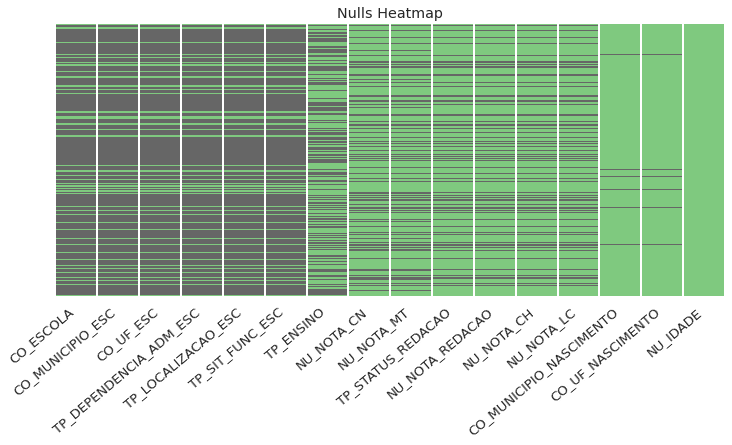

CPU times: user 41.7 s, sys: 2.21 s, total: 43.9 s
Wall time: 43.5 s


In [ ]:
%%time

# Verifica o alinhamento dos valores nulos presentes nas colunas 
# para ter ideia da perda de dados em eventual descarte de valores nulos

NBplot.plot_missing_value_heatmap(df_raw[df_na.index.to_list()])

### removendo eventuais registros duplicados

In [ ]:
%%time
# removendo eventuais linhas duplicadas

data = df_raw.drop_duplicates().copy()
print("Qtd. linhas duplicadas que foram removidas:\n",df_raw.shape[0] - data.shape[0])

# limpa a memória
del df_raw
gc.collect()

Qtd. linhas duplicadas que foram removidas:
 0
CPU times: user 15.9 s, sys: 737 ms, total: 16.6 s
Wall time: 16.6 s


In [ ]:
%%time 
numeric_col = list(data._get_numeric_data().columns)
non_numeric_col = [col for col in data.columns if col not in numeric_col]

print("Colunas numéricas:\n",numeric_col)
print("\nColunas não numéricas:\n",non_numeric_col)

Colunas numéricas:
 ['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'I

### analise inicial das variáveis alvo

In [ ]:
data[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
CO_MUNICIPIO_RESIDENCIA,3311925.000,3086009.554,997398.509,1100015.000,2404507.000,3124104.000,3549904.000,5300108.000
CO_UF_RESIDENCIA,3311925.000,30.709,9.944,11.000,24.000,31.000,35.000,53.000
NU_IDADE,3311891.000,21.962,7.461,10.000,18.000,19.000,24.000,94.000
TP_ESTADO_CIVIL,3311925.000,1.075,0.439,0.000,1.000,1.000,1.000,4.000
TP_COR_RACA,3311925.000,2.128,1.017,0.000,1.000,2.000,3.000,5.000
TP_NACIONALIDADE,3311925.000,1.030,0.210,0.000,1.000,1.000,1.000,4.000
CO_MUNICIPIO_NASCIMENTO,3217363.000,3054503.000,984118.062,1100015.000,2314102.000,3110608.000,3548708.000,5300108.000
CO_UF_NASCIMENTO,3217363.000,30.427,9.779,11.000,23.000,31.000,35.000,53.000
TP_ST_CONCLUSAO,3311925.000,1.541,0.717,1.000,1.000,1.000,2.000,4.000
TP_ANO_CONCLUIU,3311925.000,2.963,4.110,0.000,0.000,1.000,4.000,13.000


In [ ]:
targets = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

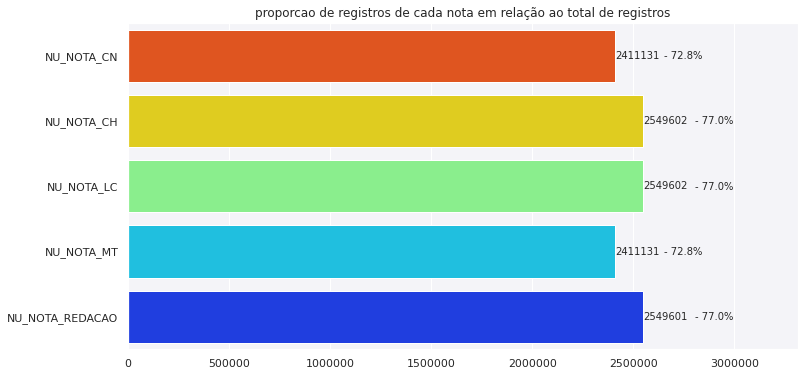

In [ ]:
# proporcao de registros de cada nota em relação ao total de registros
dict_count_notas = {}
for target in targets:
  dict_count_notas[target] = data[target].count()
  
sns.set(rc={'figure.figsize':(12,6)})

total = data.shape[0]
ax = sns.barplot(x=list(dict_count_notas.values()), y=list(dict_count_notas.keys()), palette="jet_r", orient='h')
ax.set(title='proporcao de registros de cada nota em relação ao total de registros', xlim=(0,total))
ax.ticklabel_format(style='plain', axis='x')

# valores sobre o gráfico

for container in ax.containers:
  ax.bar_label(container, fontsize=10, fmt = '%d')

for p in ax.patches:
    percentage = '- {:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_y() + p.get_width() + (p.get_width()/10)
    y = p.get_y() + p.get_height() / 2 + 0.05
    ax.annotate(percentage, (x, y), size = 10)

ax.patch.set_alpha(0.5);

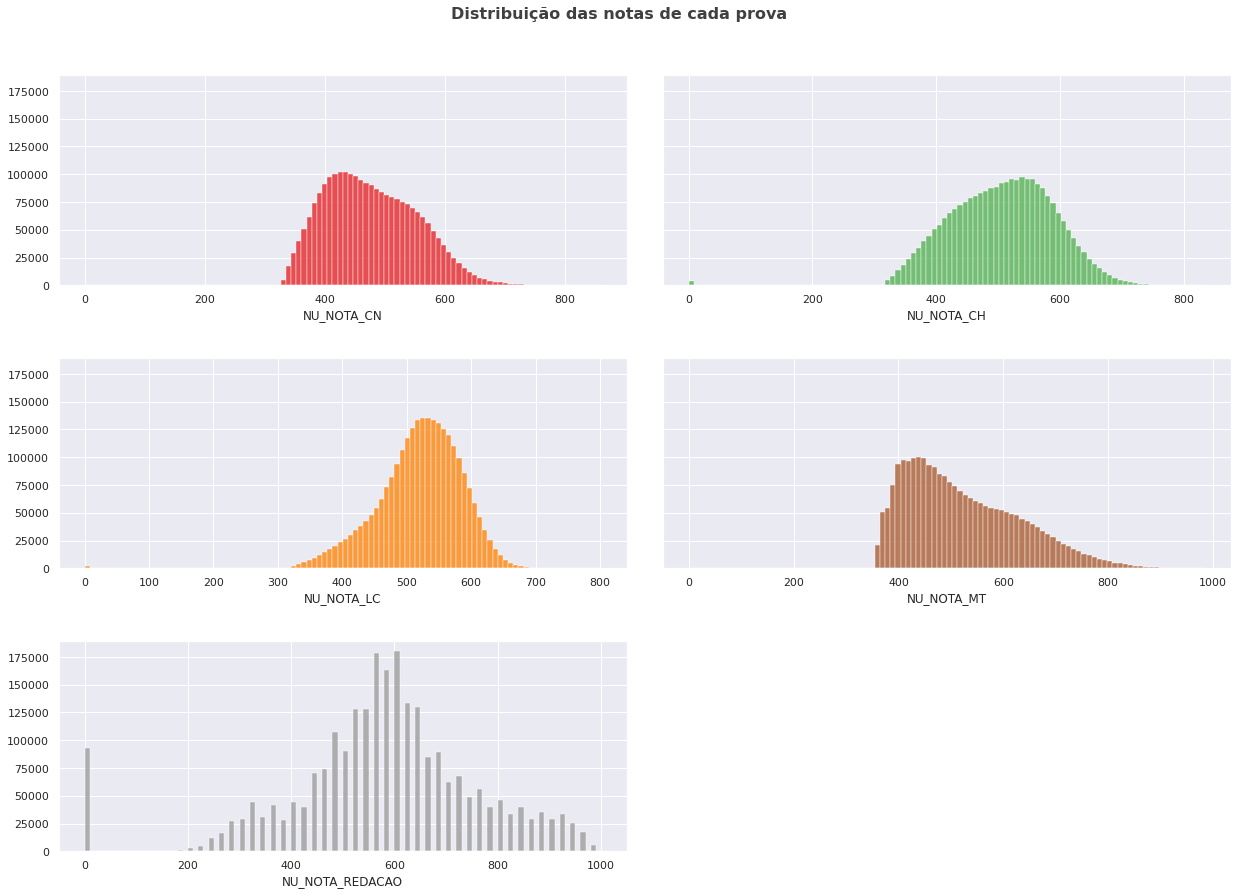

In [ ]:
# Distribuição das notas 

fig, axes = plt.subplots(3,2, figsize=(18,13), sharey=True)
fig.suptitle('Distribuição das notas de cada prova', fontsize=16, color='#404040', fontweight=600)
subplots = axes.reshape(-1)
colors = cmr.take_cmap_colors('Set1', 5, return_fmt='hex')
for i, target in enumerate(targets):
  sns.histplot(data=data, x=target, color=colors[i], bins=100, ax=subplots[i])
  subplots[i].set_xlabel(target)
  subplots[i].set_ylabel(None)

subplots[-1].set_axis_off()

fig.tight_layout(pad=3.0)
plt.show();

### análise bivariada 1: notas versus algumas variáveis de interesse

In [ ]:
recorte = data[['NU_INSCRICAO', 'CO_MUNICIPIO_PROVA', 'TP_ESCOLA', 'NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_SEXO'] + targets].dropna()
data_melted = pd.melt(recorte, id_vars=['NU_INSCRICAO', 'TP_ESCOLA', 'NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_SEXO'], value_vars=targets, var_name='NOTA_TIPO', value_name='NOTA_VALOR').set_index('NU_INSCRICAO')
data_melted.head()

,TP_ESCOLA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_SEXO,NOTA_TIPO,NOTA_VALOR
NU_INSCRICAO,,,,,,,,
d7e73c5f-2db8-4089-9bee-d3a0e045f87f,1,31.000,0,1,10,F,NU_NOTA_CN,426.500
668bf6e4-ddf7-4810-b31e-7d325e36de4d,1,23.000,1,3,3,F,NU_NOTA_CN,463.000
951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,2,17.000,0,3,0,M,NU_NOTA_CN,381.700
baf409f9-ddc6-4e82-9a4b-b64b579cd105,1,16.000,1,1,0,M,NU_NOTA_CN,426.700
9fd415ac-3421-44ce-810e-599545c3c025,1,19.000,1,1,1,M,NU_NOTA_CN,623.700


#### por tipo de escola

In [ ]:
tp_escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior'}

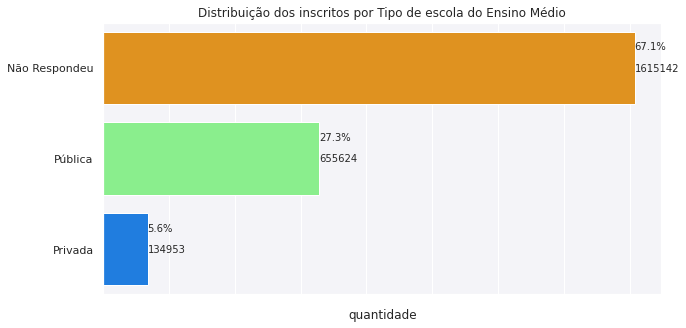

In [ ]:
# Inscritos por tipo de escola
grafico_quantidade(variavel='TP_ESCOLA', df=recorte, dict_de_para=tp_escola_dict, titulo='Distribuição dos inscritos por Tipo de escola do Ensino Médio', tamanho=(10,5));

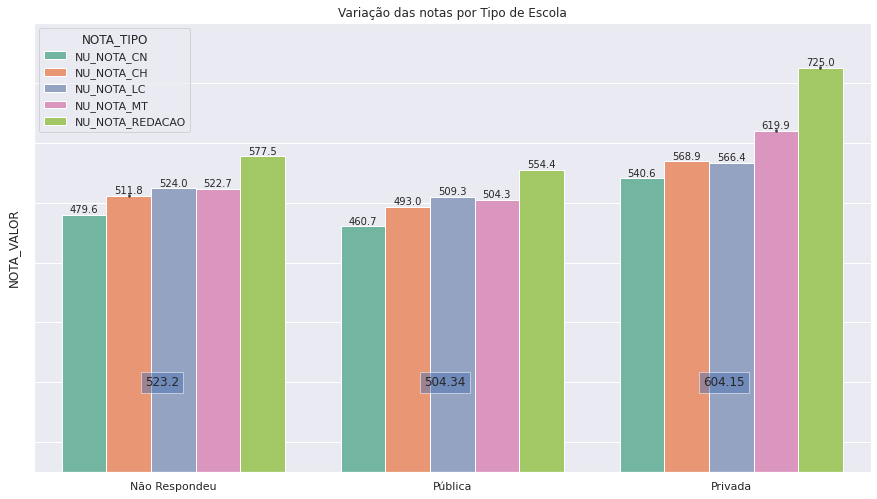

In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})

xarr = data_melted['TP_ESCOLA'].values
ticks_labels  = np.array(list(tp_escola_dict.keys()))
ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

# gráfico de barra
ax = sns.barplot(x=ind, y=data_melted["NOTA_VALOR"], hue=data_melted["NOTA_TIPO"], palette='Set2')
ax.set(title='Variação das notas por Tipo de Escola', ylim=(50,800))
ax.set_xticks(range(len(np.unique(ind))))
text_labels = np.vectorize(tp_escola_dict.get)(ticks_labels)
ax.set_xticklabels(text_labels[:len(np.unique(ind))])
ax.set_yticklabels([])

media_notas = data_melted.groupby('TP_ESCOLA')['NOTA_VALOR'].mean()

start, end = ax.get_xlim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text((0.4/media_notas.shape[0])+(((end-start)/(media_notas.shape[0]**2))*i), 200, media_notas.iloc[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())

# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', fontsize=10)

#### por genero

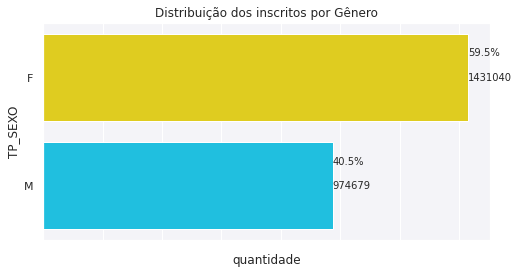

In [ ]:
# Inscritos por genero
grafico_quantidade(variavel='TP_SEXO', df=recorte, titulo='Distribuição dos inscritos por Gênero', tamanho=(8,4));

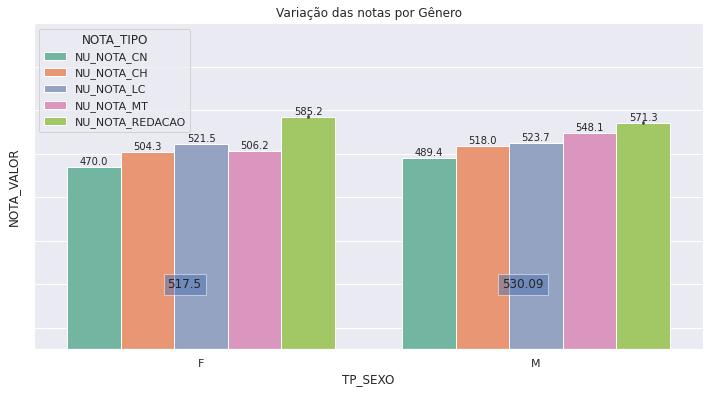

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})

# gráfico de barra
ax = sns.barplot(data=data_melted, x='TP_SEXO', y="NOTA_VALOR", hue="NOTA_TIPO", palette='Set2')
ax.set(title='Variação das notas por Gênero', ylim=(50,800))
ax.set_yticklabels([])

media_notas = data_melted.groupby('TP_SEXO')['NOTA_VALOR'].mean()

start, end = ax.get_xlim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text((0.4/media_notas.shape[0])+(((end-start)/(media_notas.shape[0]**2))*i), 200, media_notas.iloc[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())


# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', fontsize=10)

#### por raça/cor

In [ ]:
tp_raca_dict = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'}
  

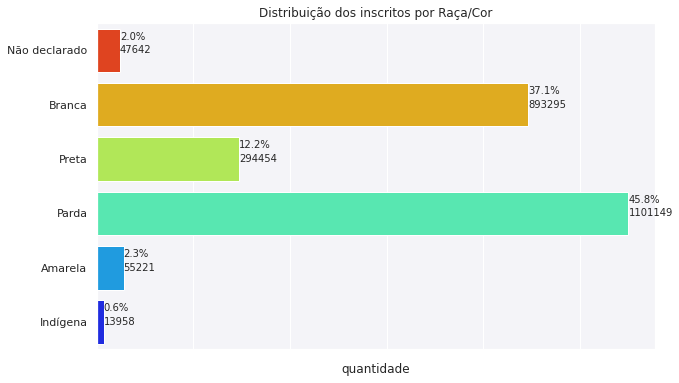

In [ ]:
grafico_quantidade(variavel='TP_COR_RACA', df=recorte, dict_de_para=tp_raca_dict, titulo='Distribuição dos inscritos por Raça/Cor', tamanho=(10,6));

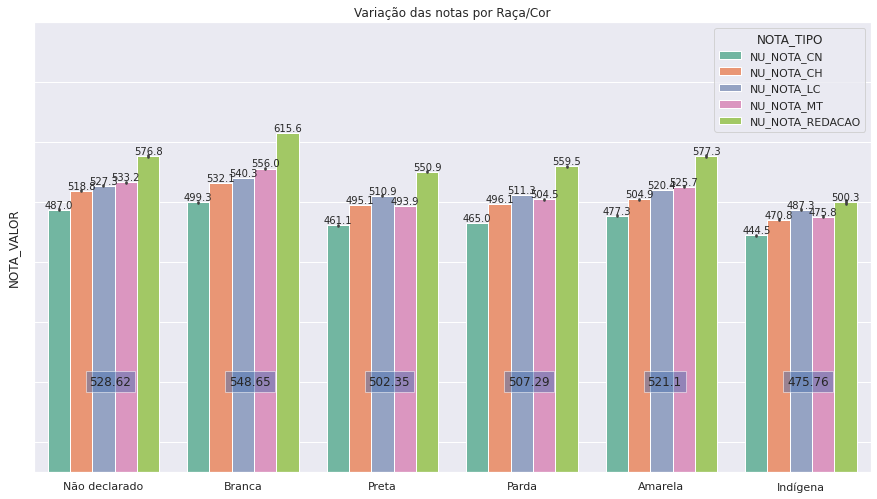

In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})

xarr = data_melted['TP_COR_RACA'].values
ticks_labels  = np.array(list(tp_raca_dict.keys()))
ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

# gráfico de barra
ax = sns.barplot(x=ind, y=data_melted["NOTA_VALOR"], hue=data_melted["NOTA_TIPO"], palette='Set2')
ax.set(title='Variação das notas por Raça/Cor', ylim=(50,800))
ax.set_xticks(range(len(np.unique(ind))))
text_labels = np.vectorize(tp_raca_dict.get)(ticks_labels)
ax.set_xticklabels(text_labels[:len(np.unique(ind))])
ax.set_yticklabels([])

media_notas = data_melted.groupby('TP_COR_RACA')['NOTA_VALOR'].mean()

start, end = ax.get_xlim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text((0.4/media_notas.shape[0])+(((end-start)/(media_notas.shape[0]**2))*i), 200, media_notas.iloc[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())


# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', fontsize=10)

#### por estado civil

In [ ]:
tp_est_civil = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)',
    3: 'Divorciado(a)',
    4: 'Viúvo(a)'}

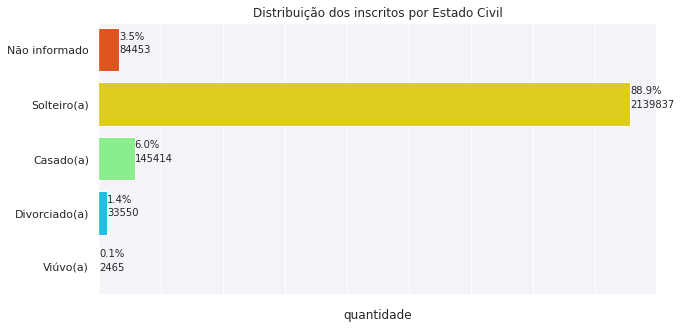

In [ ]:
# Inscritos por estado civil
grafico_quantidade(variavel='TP_ESTADO_CIVIL', df=recorte, dict_de_para=tp_est_civil, titulo='Distribuição dos inscritos por Estado Civil');

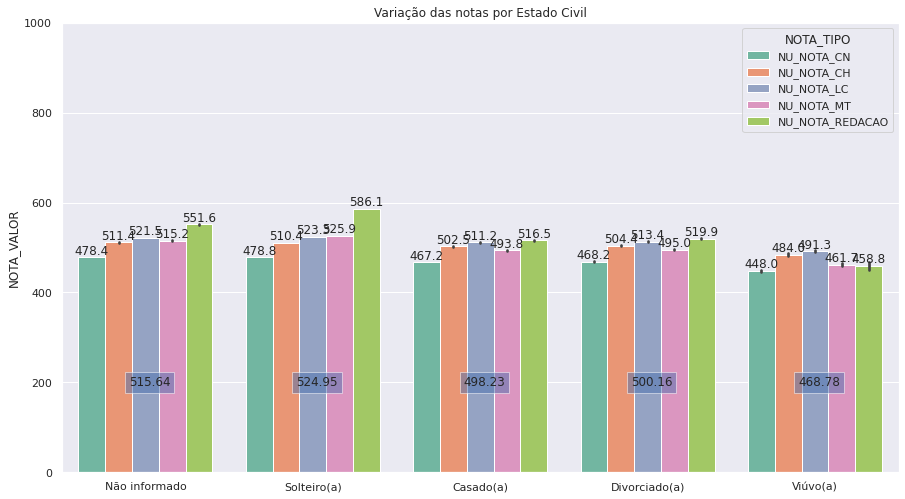

In [ ]:
xarr = data_melted['TP_ESTADO_CIVIL'].values
ticks_labels  = np.array(list(tp_est_civil.keys()))
ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

# gráfico de barra
ax = sns.barplot(x=ind, y=data_melted["NOTA_VALOR"], hue=data_melted["NOTA_TIPO"], palette='Set2')
ax.set(title='Variação das notas por Estado Civil', ylim=(50,800))
ax.set_xticks(range(len(np.unique(ind))))
text_labels = np.vectorize(tp_est_civil.get)(ticks_labels)
ax.set_xticklabels(text_labels[:len(np.unique(ind))])
ax.set_yticklabels([])

media_notas = data_melted.groupby('TP_ESTADO_CIVIL')['NOTA_VALOR'].mean()

start, end = ax.get_xlim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text((0.4/media_notas.shape[0])+(((end-start)/(media_notas.shape[0]**2))*i), 200, media_notas.iloc[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())


# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', fontsize=10)

#### por ano de conclusão

In [ ]:
dict_ano_conclusao = {
0: 'Não informado',
1: '2018',
2: '2017',
3: '2016',
4: '2015',
5: '2014',
6: '2013',
7: '2012',
8: '2011',
9: '2010',
10: '2009',
11: '2008',
12: '2007',
13: 'Antes de 2007'}

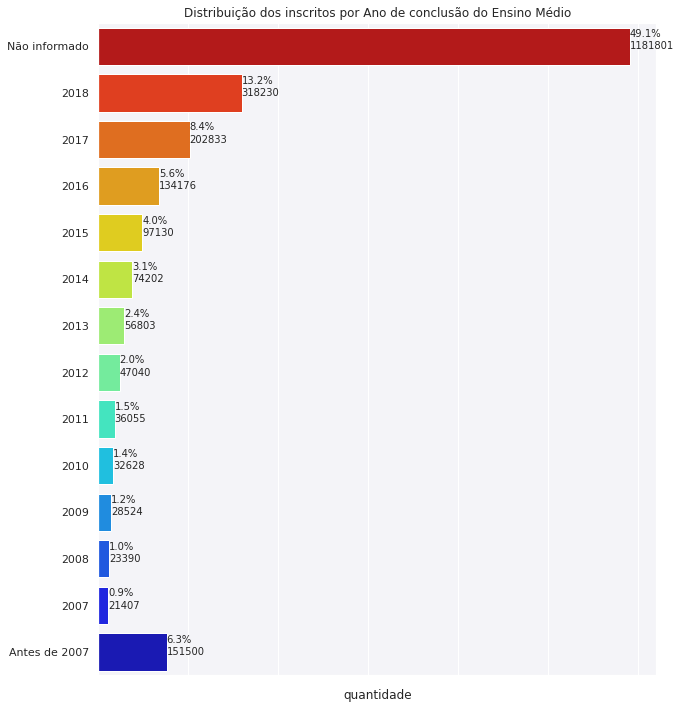

In [ ]:
grafico_quantidade(variavel='TP_ANO_CONCLUIU', df=recorte, dict_de_para=dict_ano_conclusao, titulo='Distribuição dos inscritos por Ano de conclusão do Ensino Médio', tamanho=(10,12));

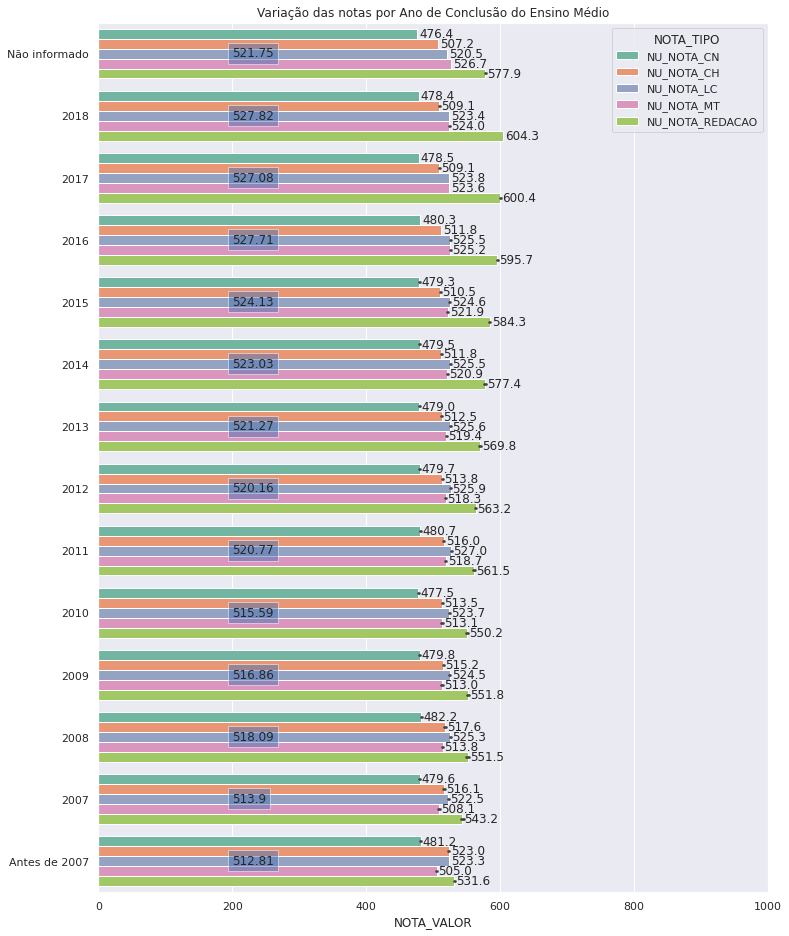

In [ ]:
sns.set(rc={'figure.figsize':(12,16)})

xarr = data_melted['TP_ANO_CONCLUIU'].values
ticks_labels  = np.array(list(dict_ano_conclusao.keys()))
ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

ax = sns.barplot(x=data_melted["NOTA_VALOR"], y=ind, hue=data_melted["NOTA_TIPO"], palette='Set2', orient='h')
ax.set(title='Variação das notas por Ano de Conclusão do Ensino Médio', xlim=(0,1000))
ax.set_yticks(range(len(ticks_labels)))
text_labels = np.vectorize(dict_ano_conclusao.get)(ticks_labels)
ax.set_yticklabels(text_labels)

media_notas = data_melted.groupby('TP_ANO_CONCLUIU')['NOTA_VALOR'].mean()

start, end = ax.get_ylim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text(0.2, (end/100)+i, media_notas[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())

# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', padding=2)


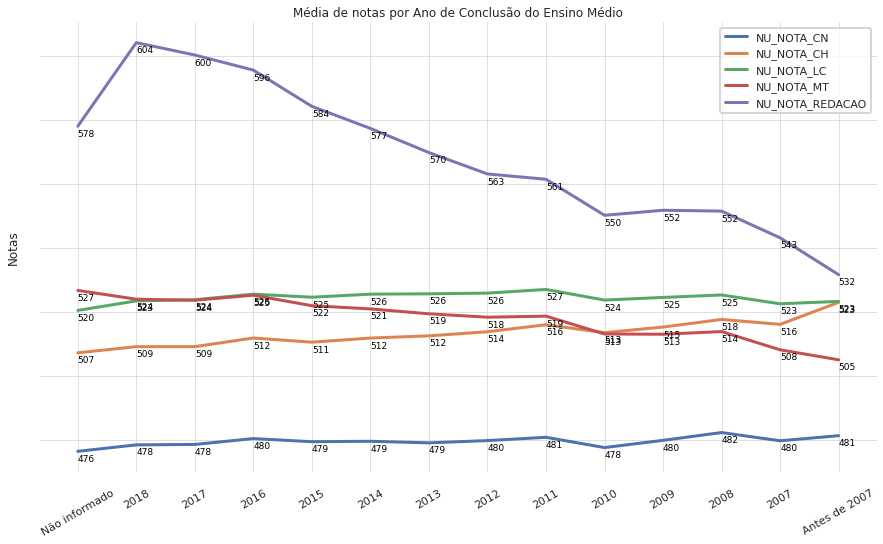

In [ ]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})

data_plot = recorte.groupby('TP_ANO_CONCLUIU')[targets].mean().reset_index()

# gráfico de area
xarr = data_plot['TP_ANO_CONCLUIU'].values
ticks_labels  = np.array(list(dict_ano_conclusao.keys()))
ind = np.where(xarr.reshape(xarr.size, 1) == ticks_labels)[1]

fig, ax = plt.subplots()
ax.set(title='Média de notas por Ano de Conclusão do Ensino Médio')
for target in targets:
  sns.lineplot(x=ind, y=data_plot[target], dashes=False, palette='tab10', markers=True, linewidth=3, label=target, ax=ax)
  # label points on the plot
  for x, y in zip(ind, data_plot[target]):    
    ax.text(x=x, y=y-3, s = '{:.0f}'.format(y), color='black', fontsize=9)

ax.set_xticks(range(len(np.unique(ind))))
text_labels = np.vectorize(dict_ano_conclusao.get)(ticks_labels)
ax.set_xticklabels(text_labels[:len(np.unique(ind))], rotation=30)
ax.set_ylabel('Notas')
ax.set_yticklabels([])
plt.legend()
sns.despine(left=True, bottom=True);

#### por idade

In [ ]:
# criando ranges de idade
recorte['NU_IDADE_RANGE'] = pd.qcut(recorte["NU_IDADE"], q=8, precision=0, duplicates='drop')
data_melted['NU_IDADE_RANGE'] = pd.qcut(data_melted["NU_IDADE"], q=8, precision=0, duplicates='drop')

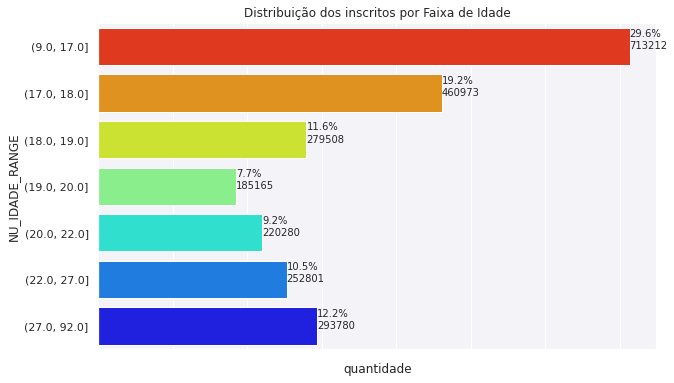

In [ ]:
grafico_quantidade(variavel='NU_IDADE_RANGE', df=recorte, titulo='Distribuição dos inscritos por Faixa de Idade', tamanho=(10,6));

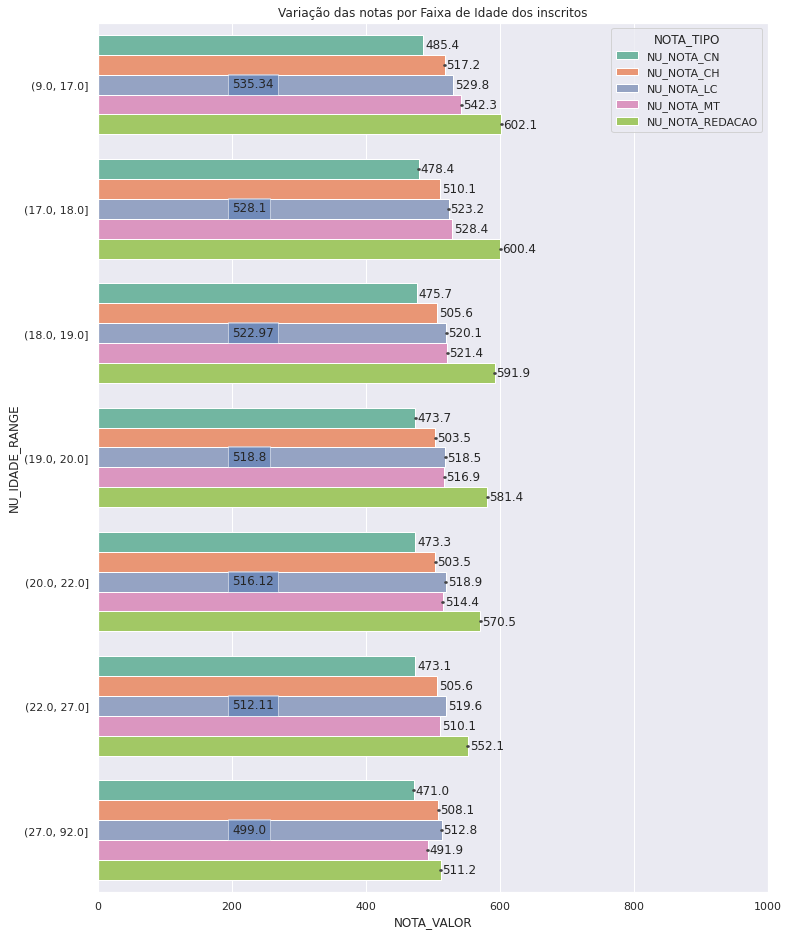

In [ ]:
sns.set(rc={'figure.figsize':(12,16)})

ax = sns.barplot(data=data_melted, x="NOTA_VALOR", y='NU_IDADE_RANGE', hue="NOTA_TIPO", palette='Set2', orient='h')
ax.set(title='Variação das notas por Faixa de Idade dos inscritos', xlim=(0,1000))

media_notas = data_melted.groupby('NU_IDADE_RANGE')['NOTA_VALOR'].mean()

start, end = ax.get_ylim()
# linhas com as médias
for i in range(media_notas.size):
  ax.text(0.2, (end/100)+i, media_notas[i].round(2), va='center', ha="left", 
          bbox=dict(facecolor="b",alpha=0.5),
          transform=ax.get_yaxis_transform())

# valores sobre o gráfico
for container in ax.containers:
  ax.bar_label(container, fmt='%.1f', padding=2)

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,15))
fig.suptitle('Distribuição das Notas por Idade')
subplots = axes.reshape(-1)
colors = cmr.take_cmap_colors('Set2', 5, return_fmt='hex')
for i, target in enumerate(targets):
  sns.barplot(data=data_melted.loc[data_melted['NOTA_TIPO']==target], x='NU_IDADE_RANGE', y="NOTA_VALOR", color=colors[i], ax=subplots[i]).set(title=target, ylim=(50,650))
  subplots[i].bar_label(subplots[i].containers[0], fontsize=10, fmt = '%d')
  subplots[i].set_xlabel('Faixa de Idade')
  subplots[i].set_ylabel(None)
  subplots[i].set_yticklabels([])

fig.tight_layout(pad=3.0)
plt.show();

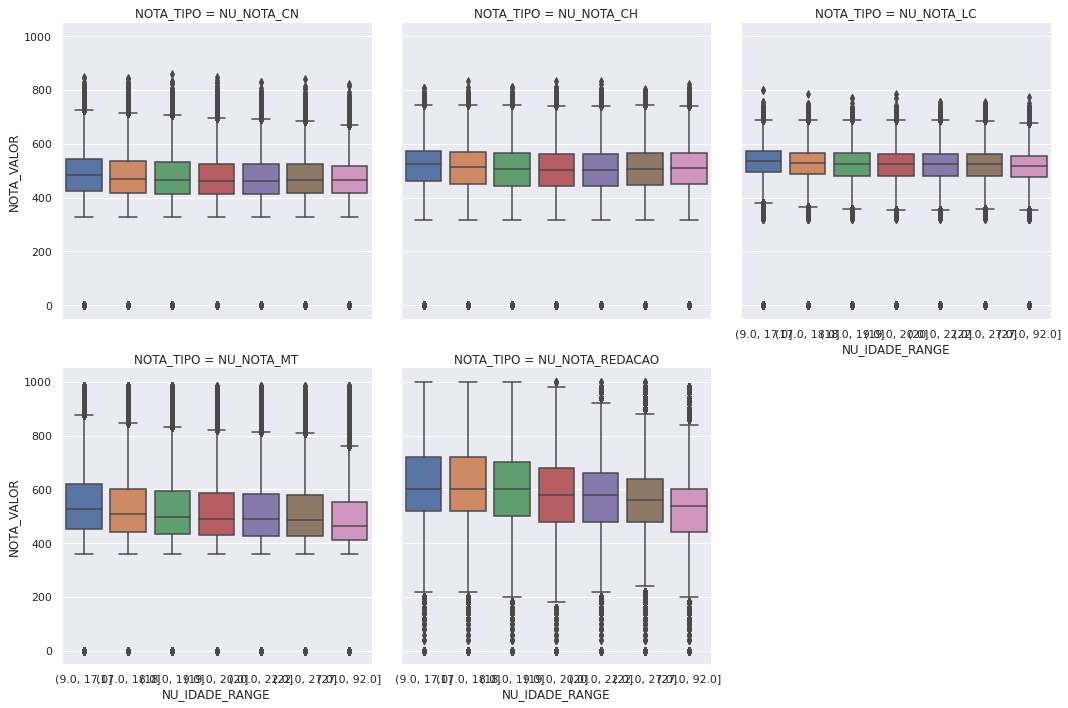

In [ ]:
sns.set(rc={'figure.figsize':(17,15)})
sns.catplot(
    data=data_melted, x='NU_IDADE_RANGE', y='NOTA_VALOR',
    col='NOTA_TIPO', kind='box', col_wrap=3
);